# Optiver Ant Puzzle
This notebook goes over and answers Optiver Ant Puzzle.

Approach: create a main class called `AntParentClass` which is used as a parent class by a new child class for each one of the three questions. The `boundary` condition of this parent class has been left as an abstract method and will be overwritten by the child class.

### Questions:
An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

1. If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?
2. What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?
3. Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by ( (x – 2.5cm) / 30cm )2 + ( (y – 2.5cm) / 40cm )2 < 1 in coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.

In [25]:
import numpy as np
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt

In [26]:
class AntParentClass(ABC):
    def __init__(self, ant_num: int = 10_000, x_0: int = 0, y_0: int = 0, ant_speed: int = 10):
        self.x_0 = x_0
        self.y_0 = y_0
        self.ant_num = ant_num
        self.ant_speed = ant_speed
        
        self.time_array = np.zeros(self.ant_num)
        self.space_array = np.zeros((self.ant_num, 2))
        
        self.ant_reached = [0]

    def rand_walk(self):
        directions = np.random.randint(0, 4, self.ant_num)

        north = np.where(directions == 0)
        self.space_array[north, 0] += self.ant_speed

        east = np.where(directions == 1)
        self.space_array[east, 1] += self.ant_speed

        south = np.where(directions == 2)
        self.space_array[south, 0] -= self.ant_speed

        west = np.where(directions == 3)
        self.space_array[west, 1] -= self.ant_speed

    def update_time(self):
        self.time_array[~np.isnan(self.space_array[:, 0])] += 1

    @abstractmethod
    def boundary(self):
        pass

    def step(self):
        self.rand_walk()
        self.update_time()
        self.boundary()
        self.ant_reached.append(len(np.where(np.isnan(ant.space_array[:, 0]) == True)[0]))

# Q1

In [27]:
class antQ1(AntParentClass, ABC):
    def __init__(self):
        super().__init__()

    def boundary(self):
        reached = np.where(np.any(((self.space_array >= 20) | (self.space_array <= -20)), axis=1))
        self.space_array[reached] = np.nan


if __name__ == '__main__':
    ant = antQ1()
    steps = 100
    for i in range(steps):
        ant.step()

    mean_time = ant.time_array.mean()
    print(f'Average time for an ant to reach food is: {mean_time:.2f}s')

Average time for an ant to reach food is: 4.50s


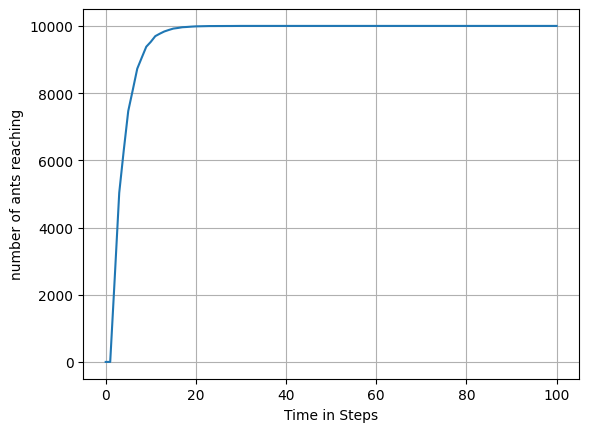

In [28]:
plt.plot(ant.ant_reached);
plt.xlabel('Time in Steps')
plt.ylabel('number of ants reaching')
plt.grid()
plt.show()

# Q2

In [29]:
class antQ2(AntParentClass, ABC):
    def __init__(self, ant_num):
        super().__init__(ant_num=ant_num)

    def boundary(self):
        reached = self.space_array[:, 1] >= 10 - self.space_array[:, 0]
        self.space_array[reached] = np.nan


if __name__ == '__main__':
    steps = 100
    number_of_ant = 10_000
    ant = antQ2(ant_num=number_of_ant)
    for i in range(steps):
        ant.step()

    mean_time = ant.time_array.mean()
    print(f'Average time for an ant to reach food is: {mean_time:.2f}s')

Average time for an ant to reach food is: 14.82s


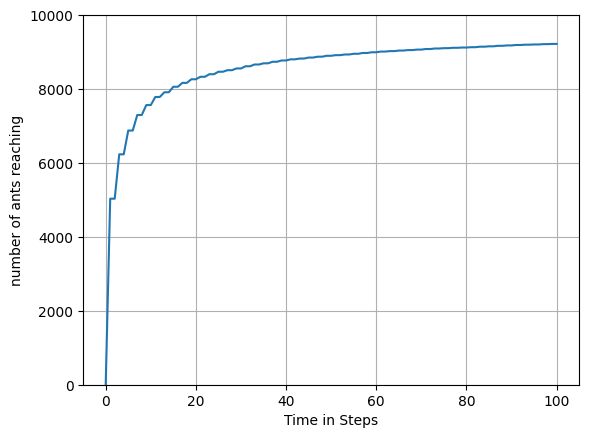

In [30]:
plt.plot(ant.ant_reached);
plt.xlabel('Time in Steps')
plt.ylabel('number of ants reaching')
plt.grid()
plt.ylim([0, number_of_ant])
plt.show()

Another way to approach this could be to check time when a certain percentage of ants have reached food (95% for example):

In [31]:
if __name__ == '__main__':

    ant_reached = 0
    number_of_ant = 100_000
    percentage_required = 0.95
    
    ant = antQ2(ant_num=number_of_ant)
    
    while ant_reached < percentage_required * number_of_ant:
        ant.step()
        ant_reached = len(np.where(np.isnan(ant.space_array[:, 0]) == True)[0])

    mean_time = ant.time_array.mean()
    print(f'Average time for 95% of ants to reach food is: {mean_time:.2f}s')

Average time for 95% of ants to reach food is: 23.77s


# Q3

In [32]:
class antQ3(AntParentClass, ABC):
    def __init__(self, ant_num):
        super().__init__(ant_num=ant_num)

    def boundary(self):
        x = self.space_array[:, 0]
        y = self.space_array[:, 1]
        reached = ((x-2.5)/30)**2 + ((y-2.5)/40)**2 >= 1
        self.space_array[reached] = np.nan


if __name__ == '__main__':
    steps = 100
    ant_reached = 0
    number_of_ant = 100_000
    percentage_required = 0.95
    
    ant = antQ3(ant_num=number_of_ant)
    
    for i in range(steps):
        ant.step()
        
#     while ant_reached < percentage_required * number_of_ant:
#         ant.step()
#         ant_reached = len(np.where(np.isnan(ant.space_array[:, 0]) == True)[0])

    mean_time = ant.time_array.mean()
    print(f'Average time for an ant to reach food is: {mean_time:.2f}s')

Average time for an ant to reach food is: 13.98s


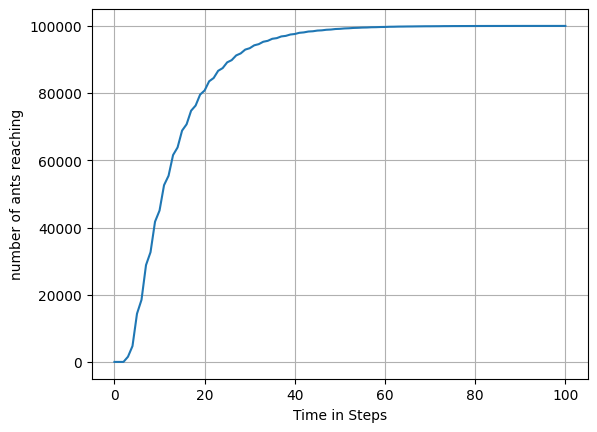

In [33]:
plt.plot(ant.ant_reached);
plt.xlabel('Time in Steps')
plt.ylabel('number of ants reaching')
plt.grid()
plt.show()

# Conclusion
When taking 100 steps only, it is clear that in Q1 and Q3 scenarios, almost all the ants reach the food. However, it is worth noting that if ants in Q2 initially find food much faster than in the other two scenarios, numbers tends to plateau around 90% of ants reaching food.